# Sparse Hebbian Learning with Histogram Equalization Homeostasis : testing with different learning rates

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

It uses the full homeostasis layer (by setting ``alpha_homeo=0.``) - to be compared to a smoother Olshausen-like homeostasis.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)
from copy import deepcopy

In [ ]:
from shl_scripts.shl_experiments import SHL_set
tag = 'HEH'
#opts = dict(homeo_method=tag, eta_homeo=0.01, alpha_homeo=0.8, C=5., nb_quant=128, P_cum=None, verbose=0)
opts = dict(homeo_method=tag, P_cum=None, verbose=0)
experiments = SHL_set(opts, tag=tag)
list_figures = []
list_figures = ['show_dico']
display_variables = ['error', 'logL', 'cputime']

In [ ]:
!ls -l {experiments.shl.data_cache}/{tag}*

# new framework

In [ ]:
from shl_scripts.shl_experiments import SHL_set
tag = 'HEH'
experiments = SHL_set({})


In [15]:
%%writefile {experiments.shl.data_cache}/{tag}.py

import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

try:
    import sys
    command = sys.argv[1]
except:
    command = 'run'

from shl_scripts.shl_experiments import SHL_set
tag = 'HEH'
opts = dict(homeo_method=tag, verbose=0)

experiments = SHL_set(opts, tag=tag)

variables = ['eta', 'alpha_homeo']
variables = ['eta', 'alpha_homeo', 'eta_homeo']
variables = ['eta', 'alpha_homeo', 'eta_homeo', 'l0_sparseness']

if command == 'run':
    for variable in variables:
        experiments.scan(variable=variable, list_figures=[], display='')

if command == 'plot':
    #fig, ax = experiments.scan(variable='eta', list_figures=[], display='dynamic')
    #fig, ax = experiments.scan(variable='eta', list_figures=[], display='final')
    list_figures = []
    list_figures = ['show_dico']
    display_variables = ['error', 'logL', 'cputime']
    for variable in variables:
        experiments = SHL_set(opts, tag=tag)
        experiments.scan(variable=variable, list_figures=list_figures, display='')
        plt.show()

        for display_variable in display_variables:
            print('Time evolution of ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='dynamic', display_variable=display_variable)
            plt.show()
        plt.show()

        for display_variable in display_variables:
            print('Comparison at the end of learning for ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', 
                                       label=tag, display_variable=display_variable)
            plt.show()
        

Overwriting data_cache/HEH.py


In [16]:
%run {experiments.shl.data_cache}/{tag}.py run

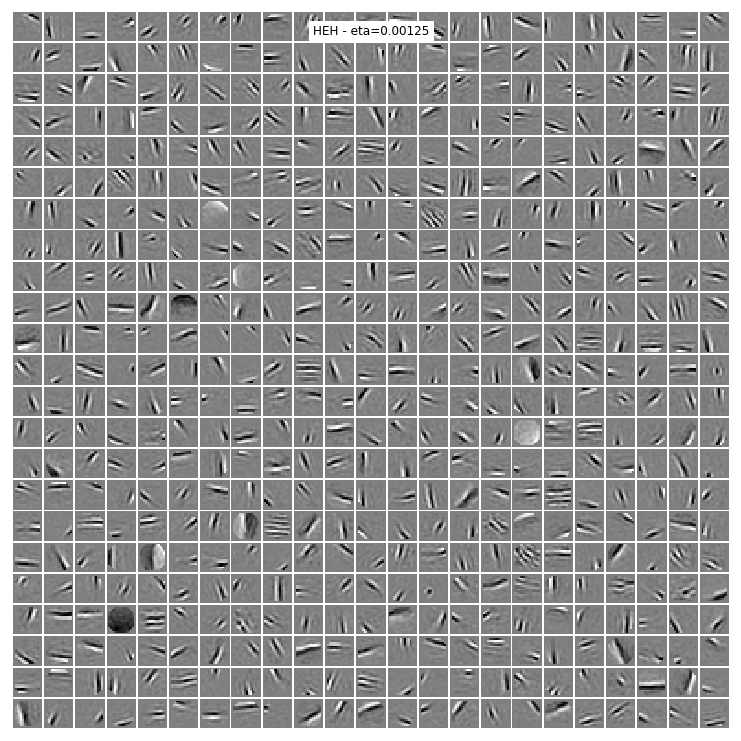

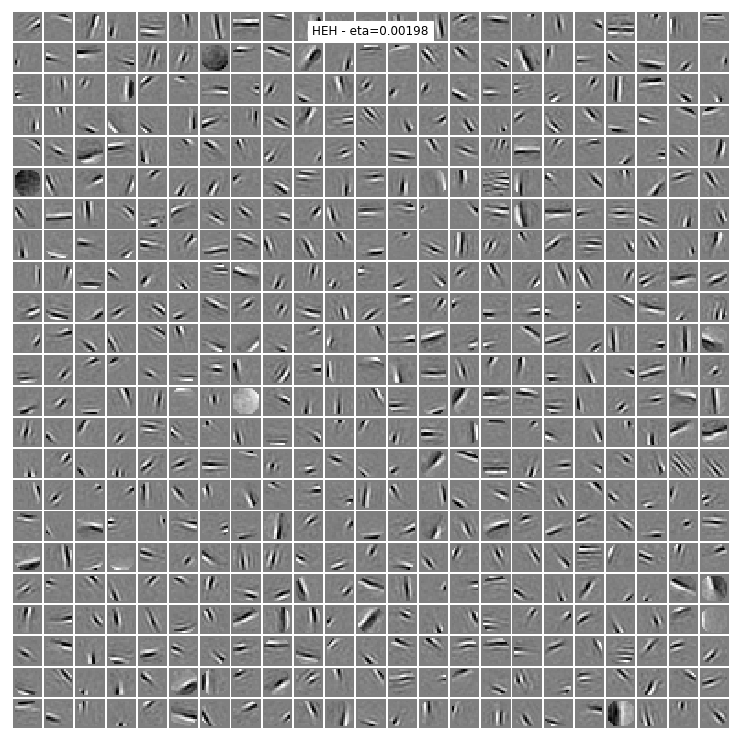

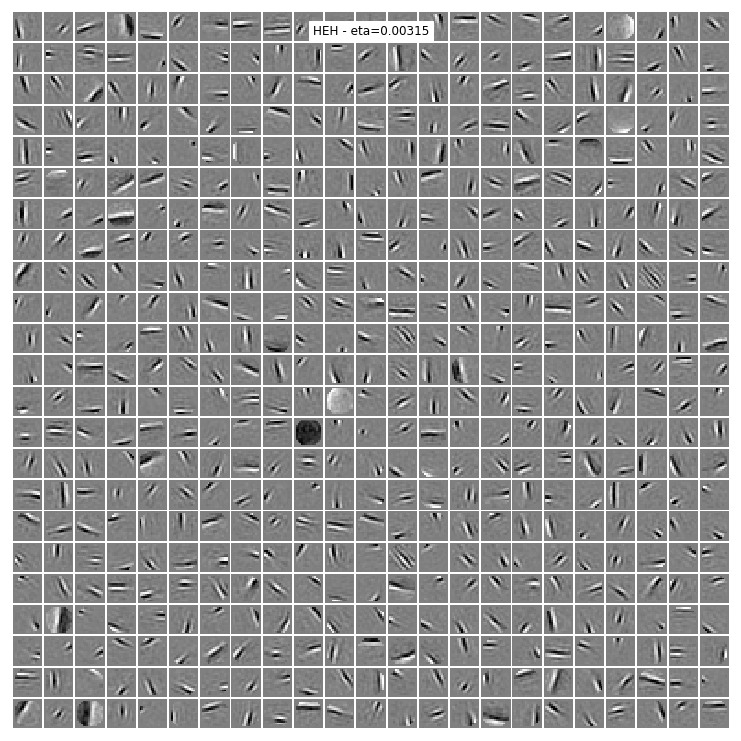

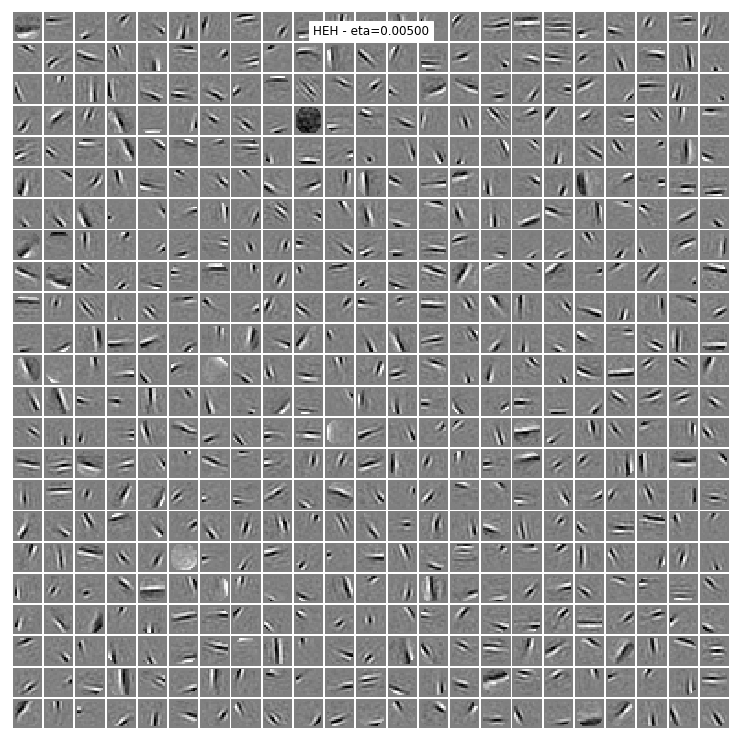

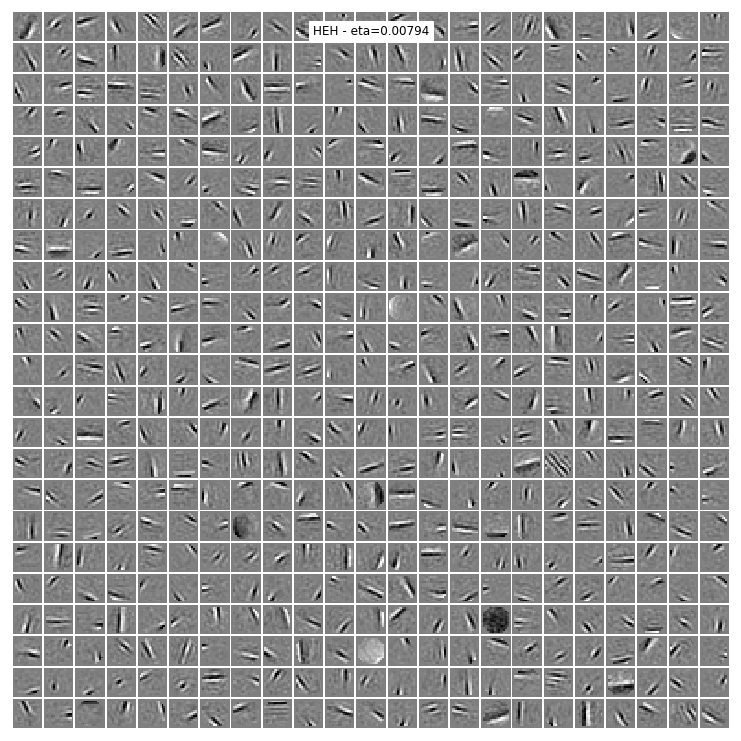

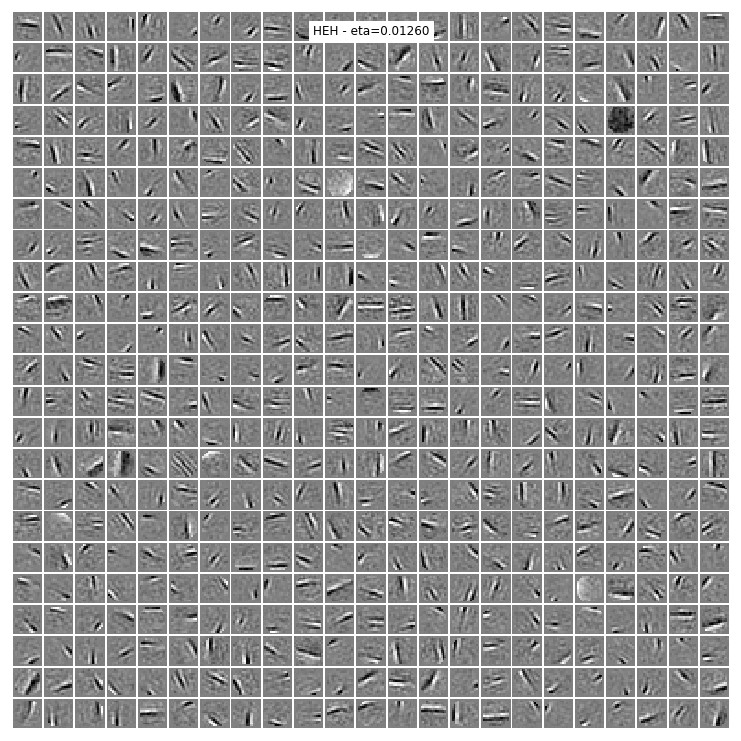

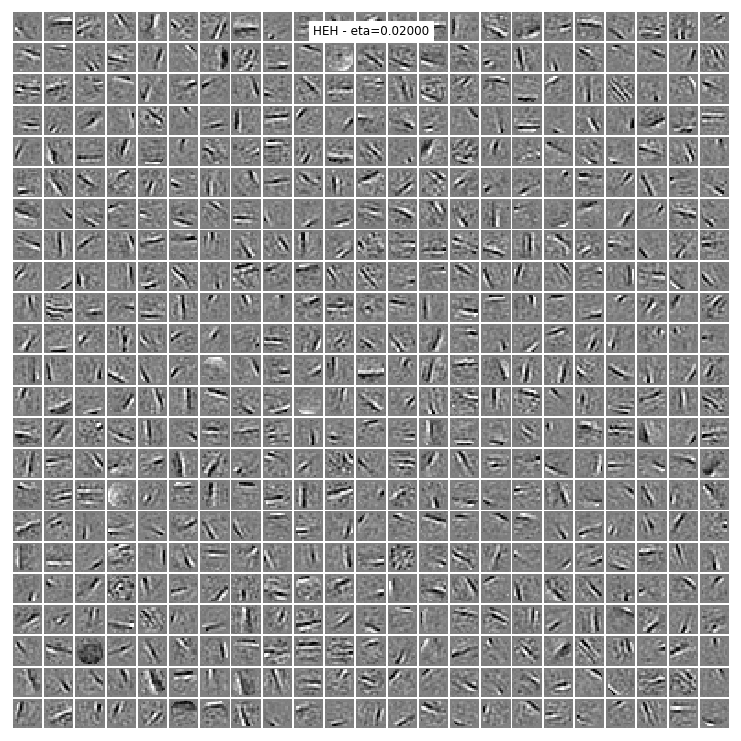

Time evolution of  error


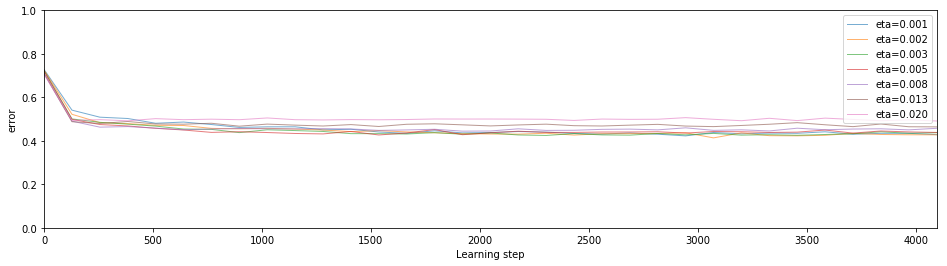

Time evolution of  logL


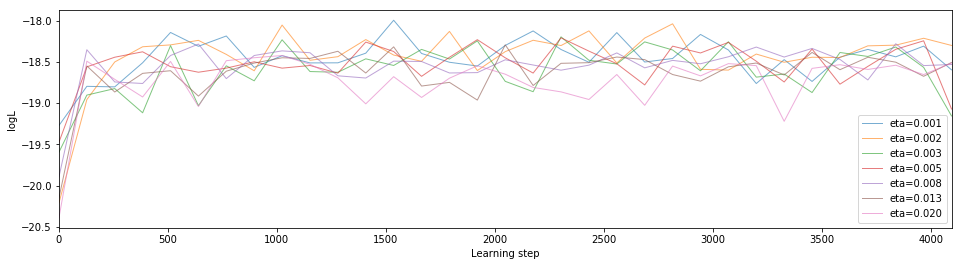

Time evolution of  cputime


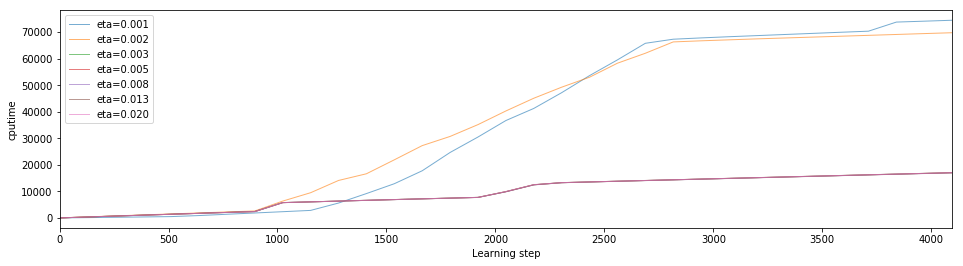

Comparison at the end of learning for  error


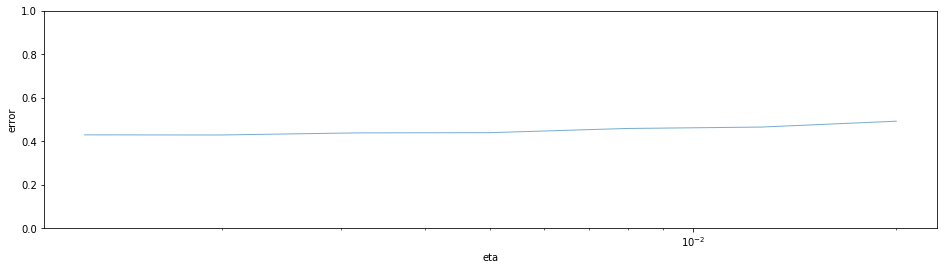

Comparison at the end of learning for  logL


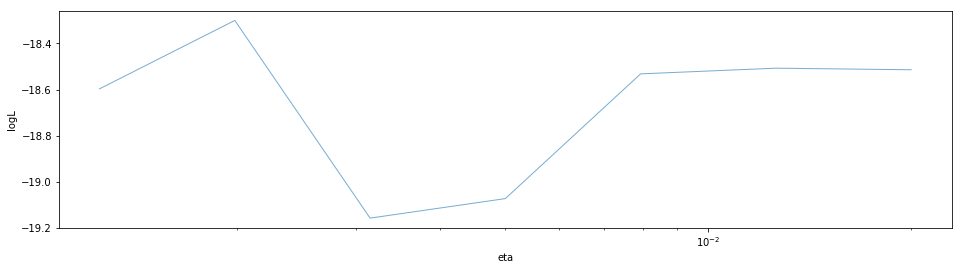

Comparison at the end of learning for  cputime


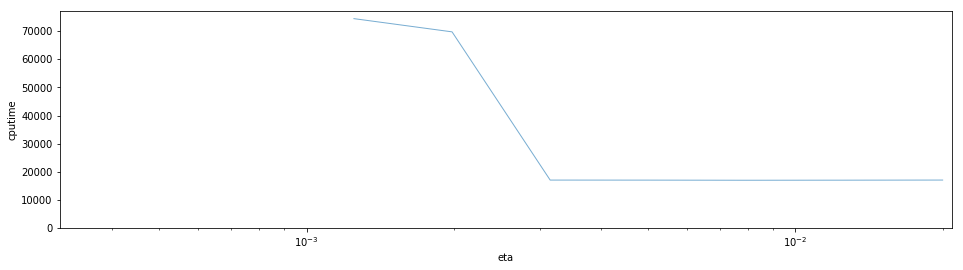

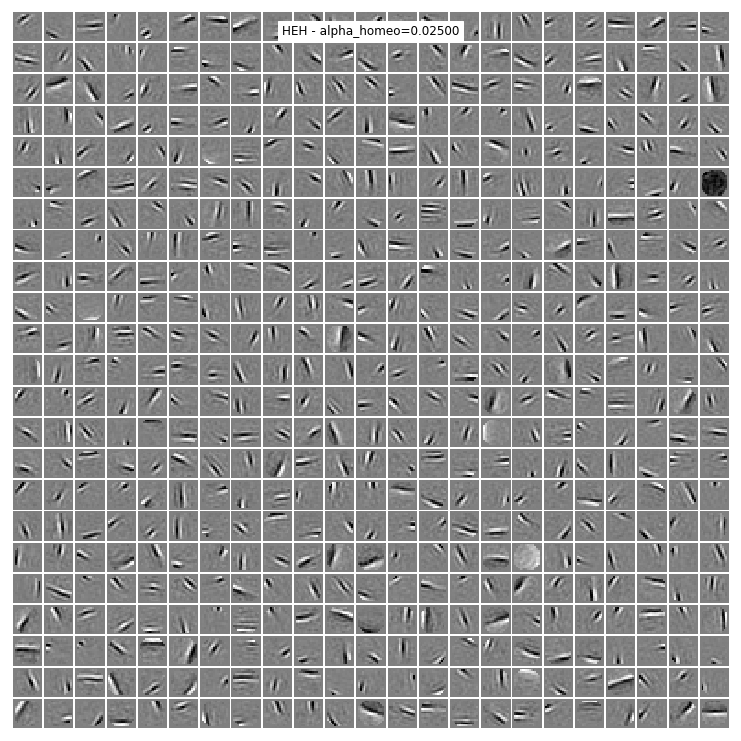

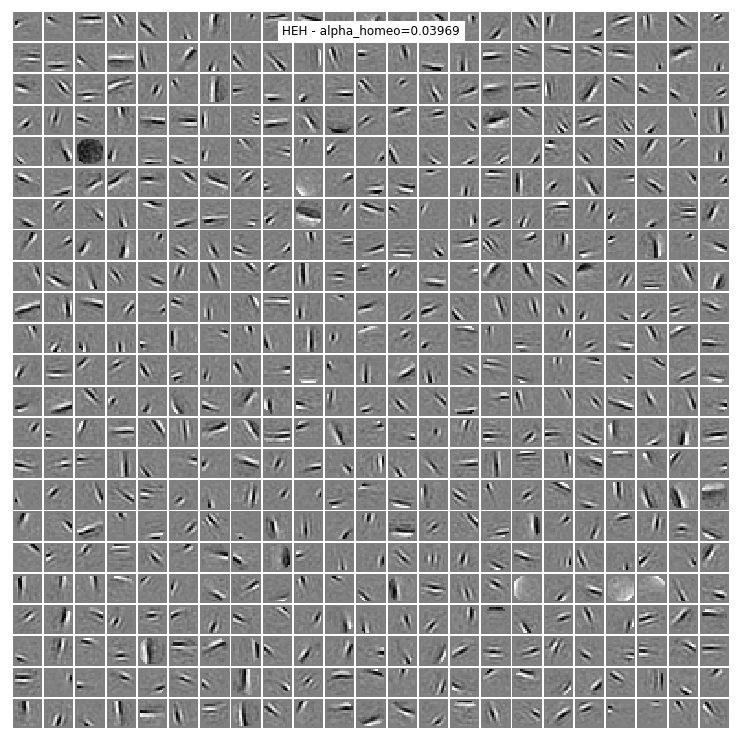

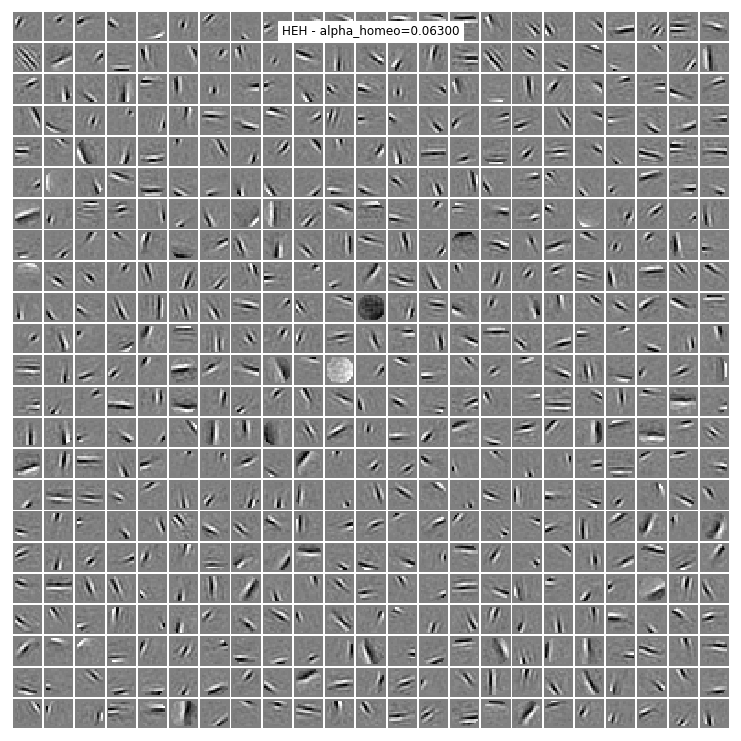

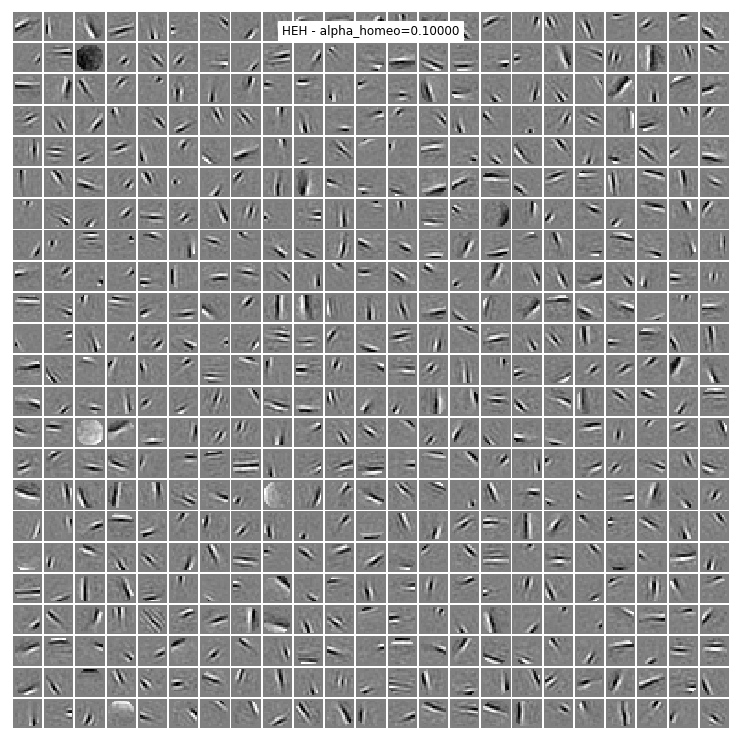

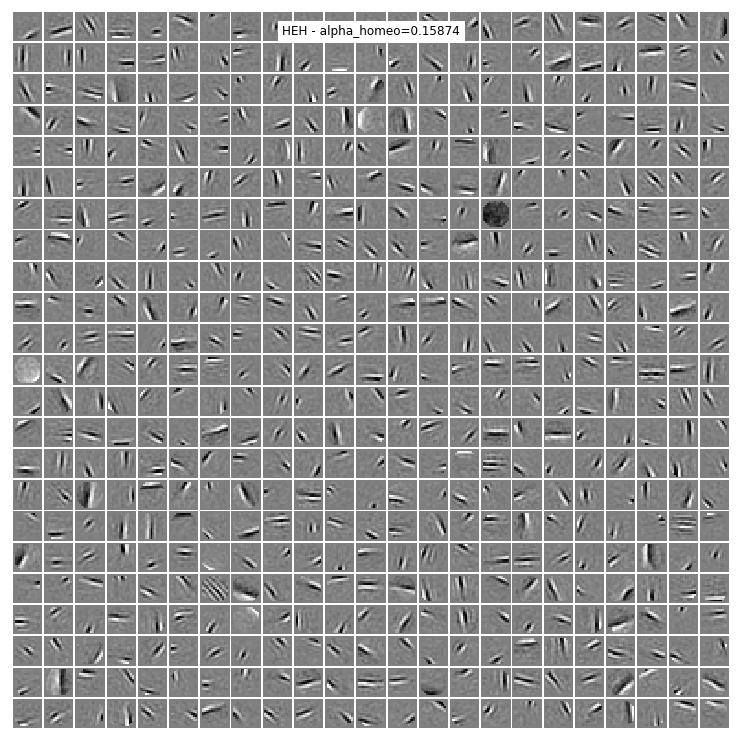

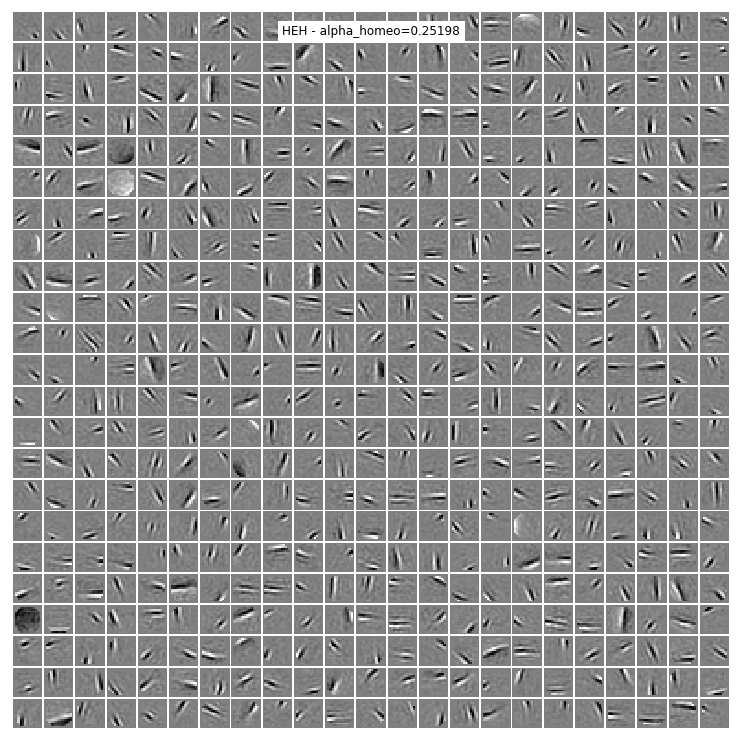

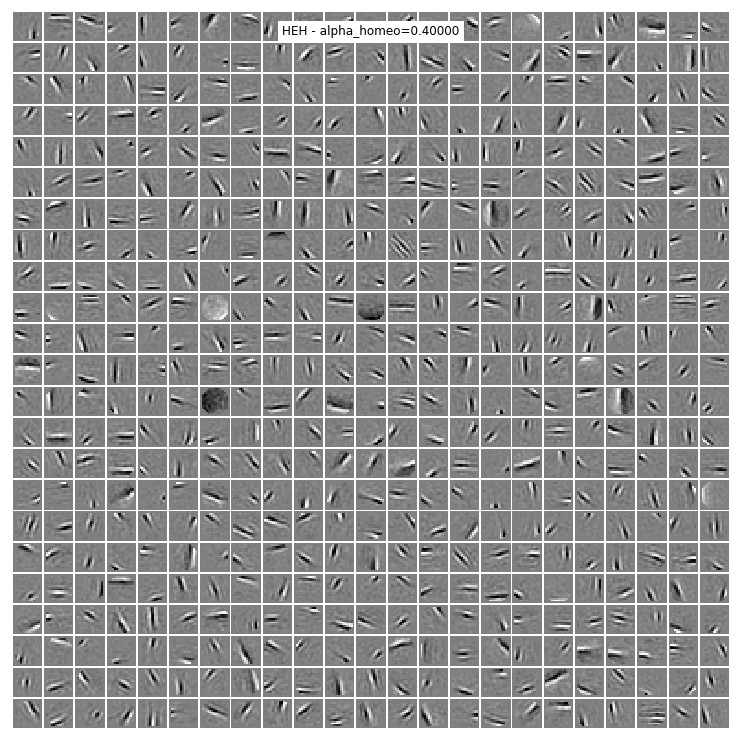

Time evolution of  error


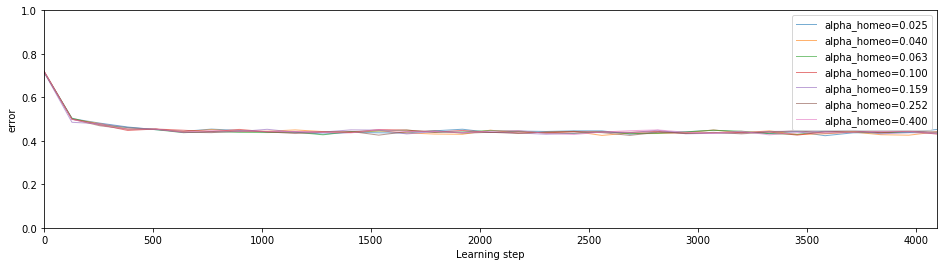

Time evolution of  logL


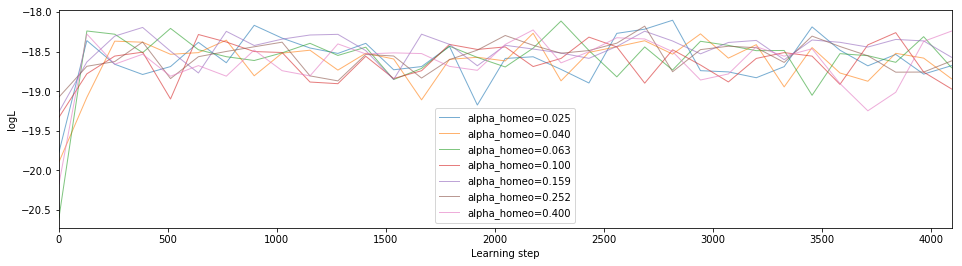

Time evolution of  cputime


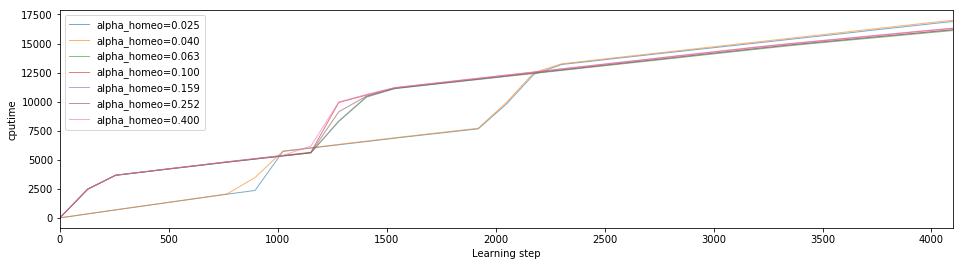

Comparison at the end of learning for  error


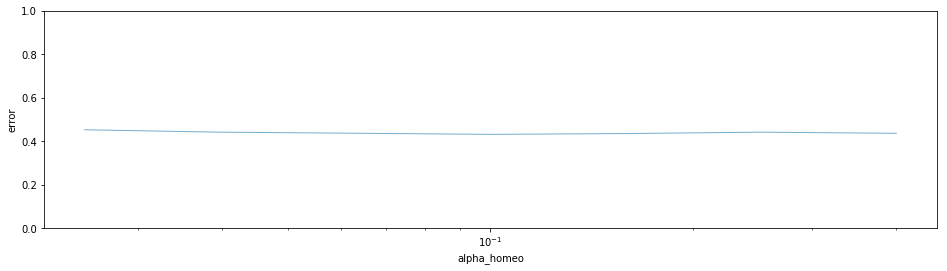

Comparison at the end of learning for  logL


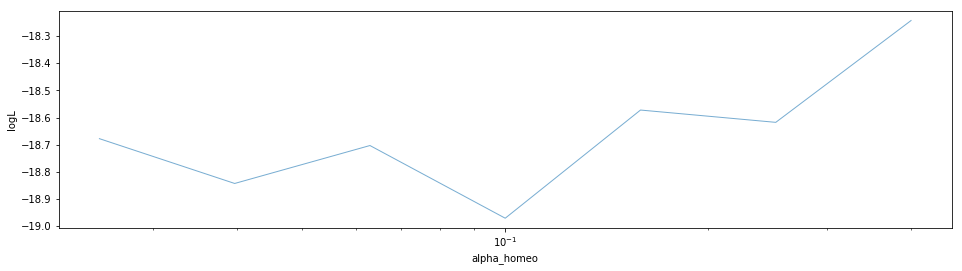

Comparison at the end of learning for  cputime


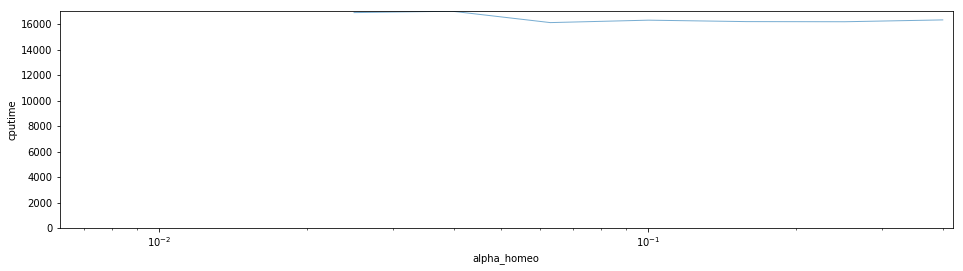

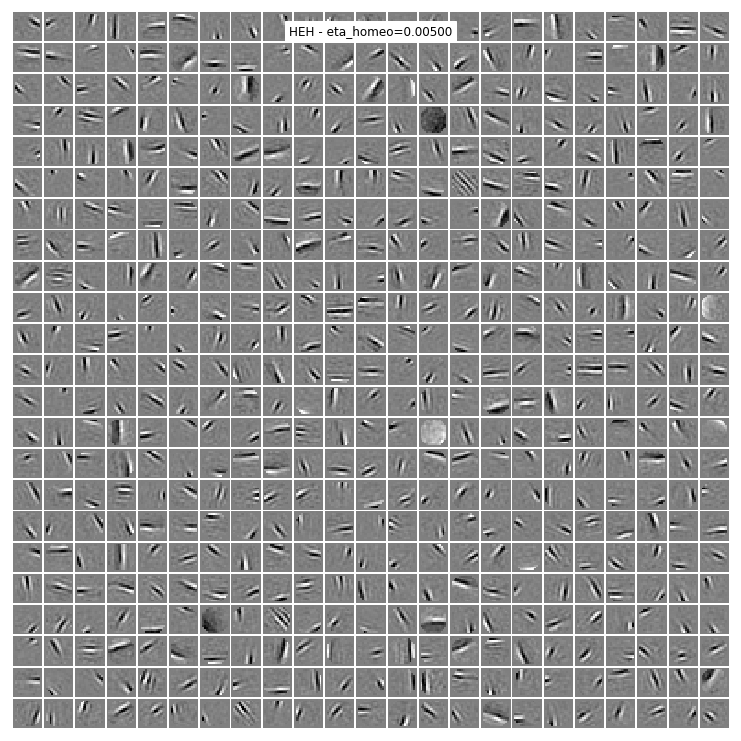

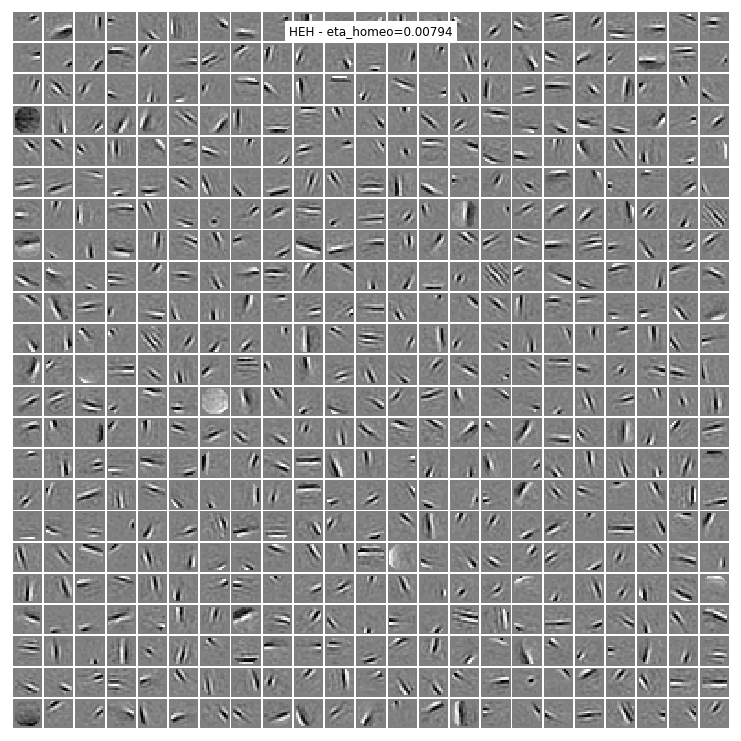

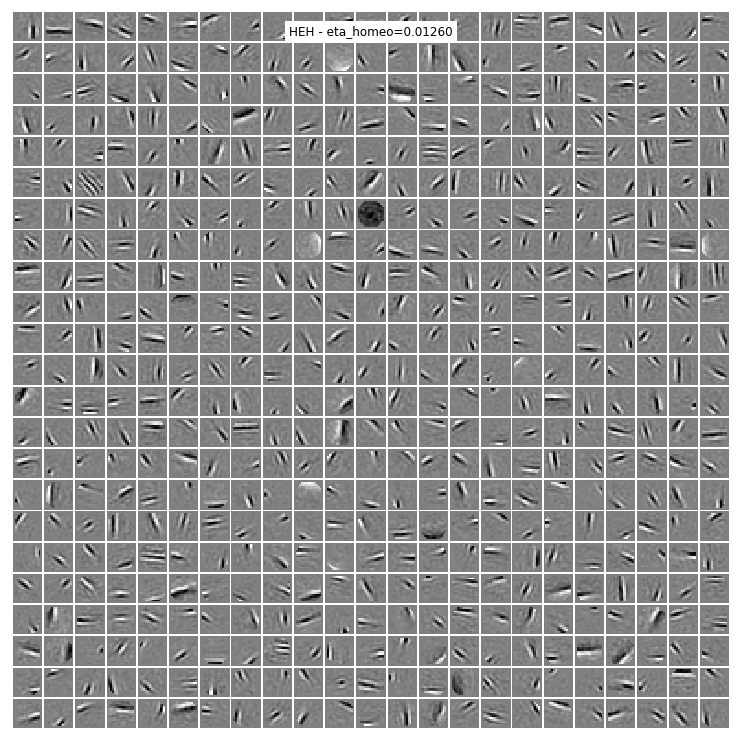

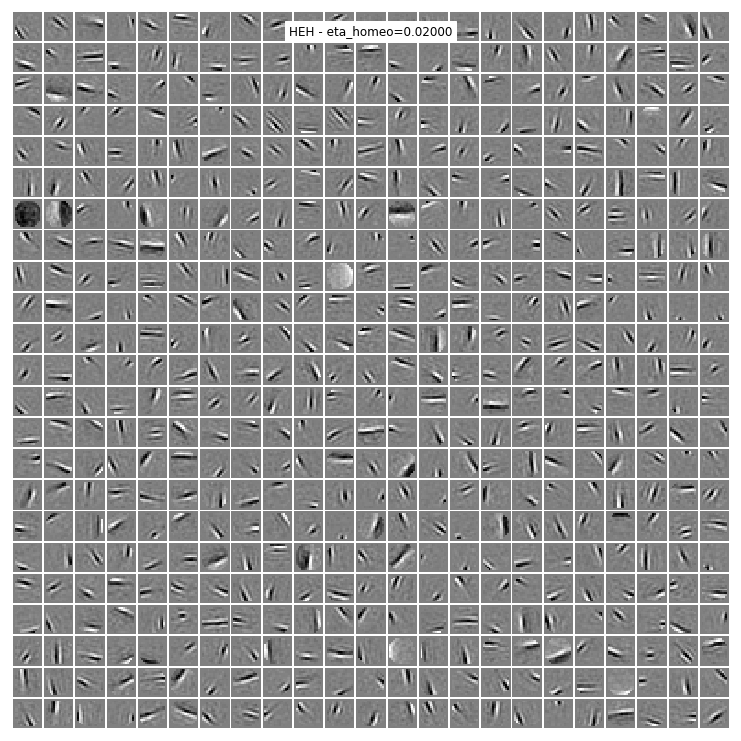

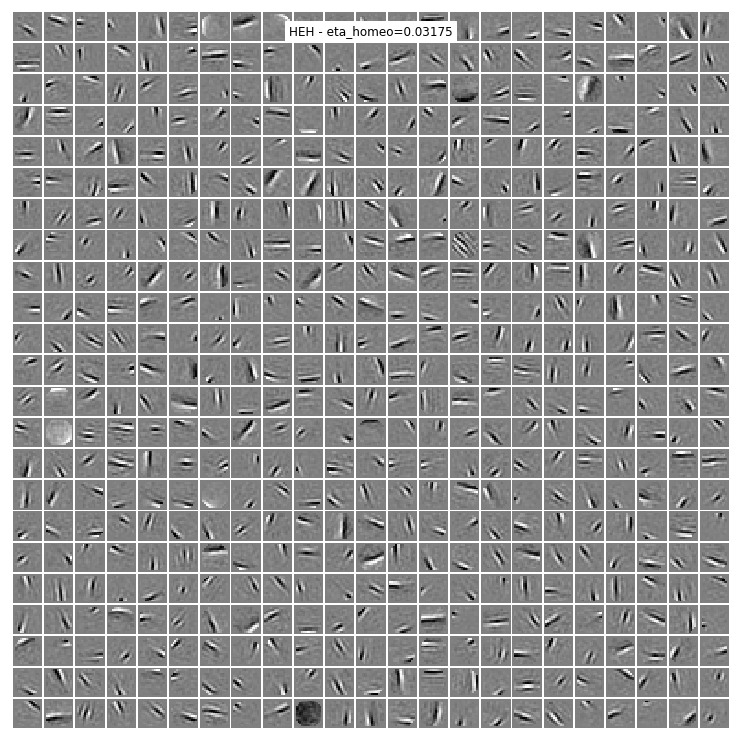

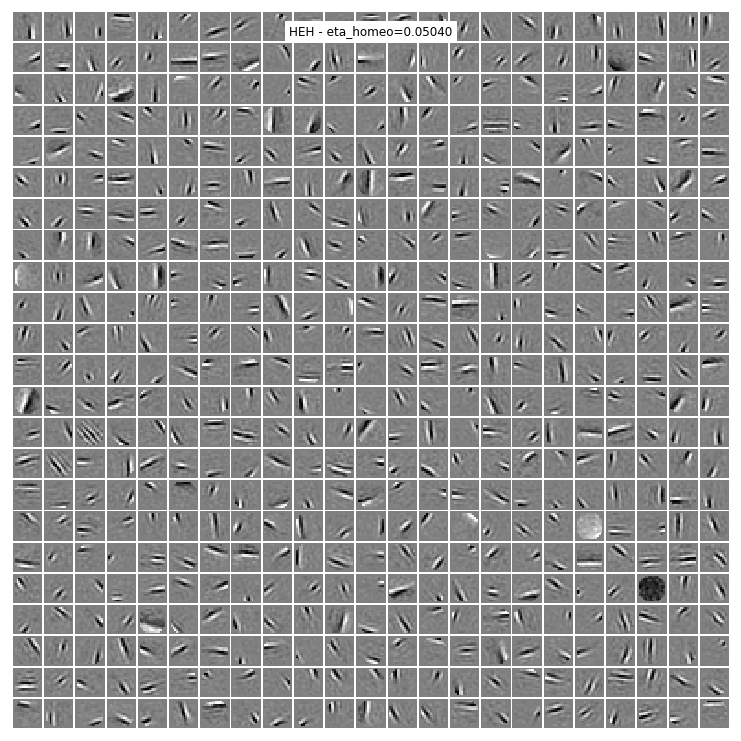

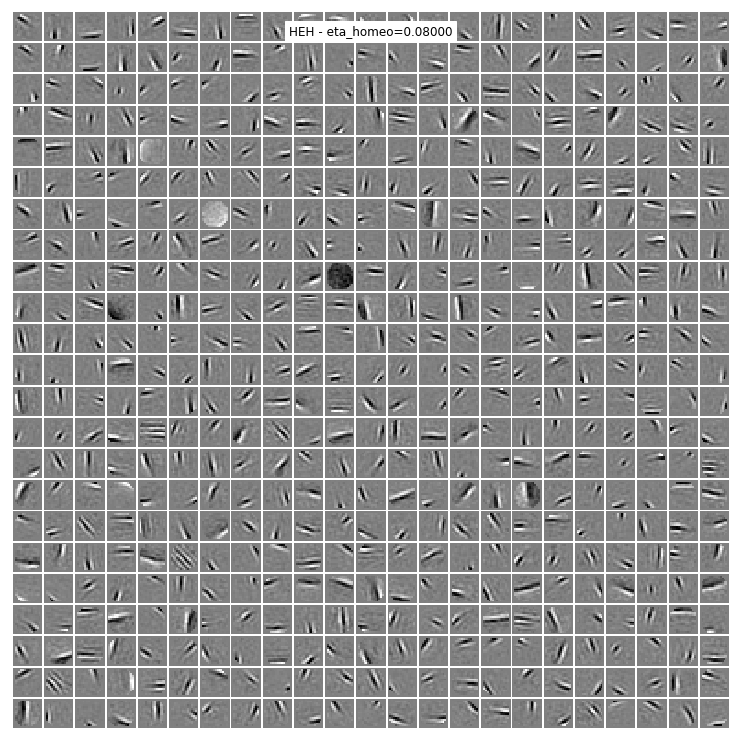

Time evolution of  error


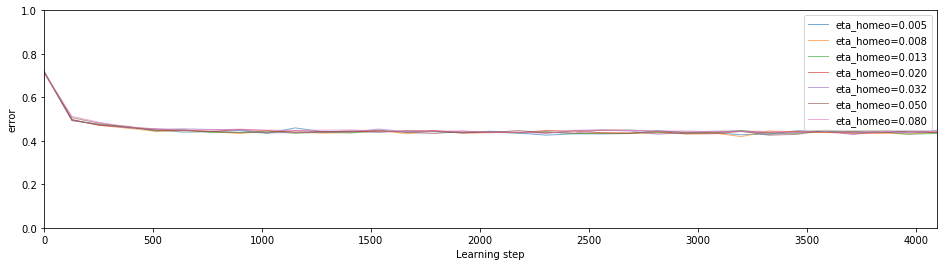

Time evolution of  logL


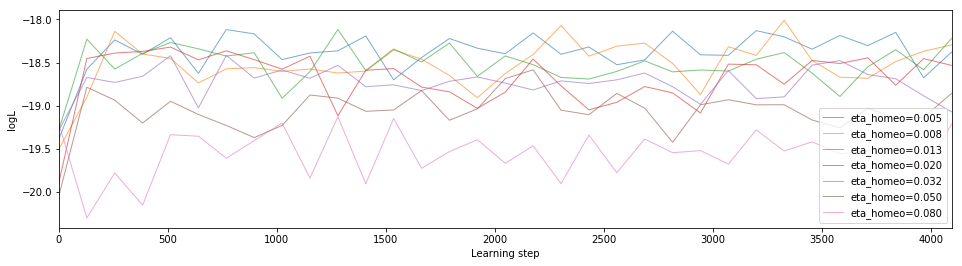

Time evolution of  cputime


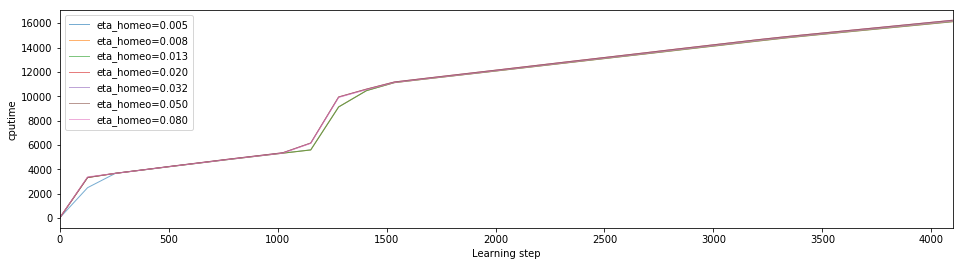

Comparison at the end of learning for  error


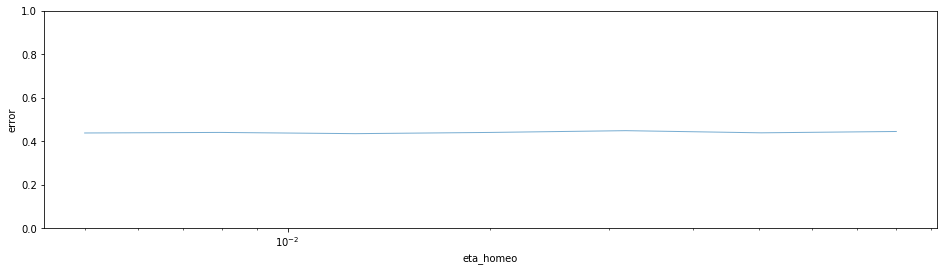

Comparison at the end of learning for  logL


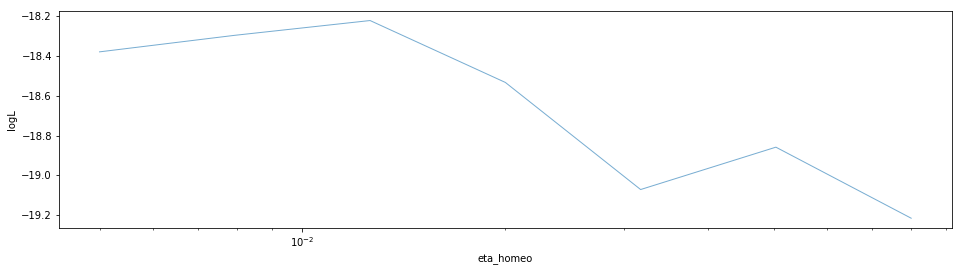

Comparison at the end of learning for  cputime


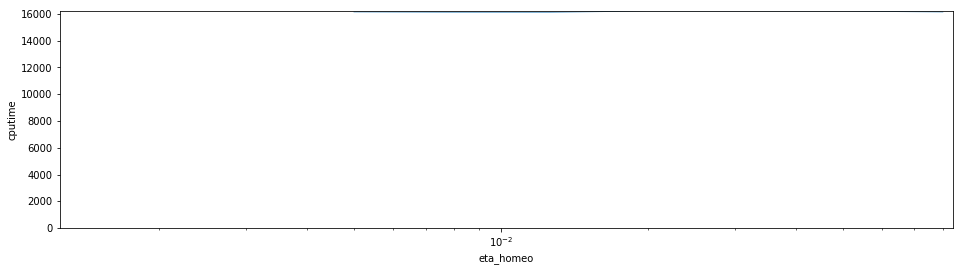

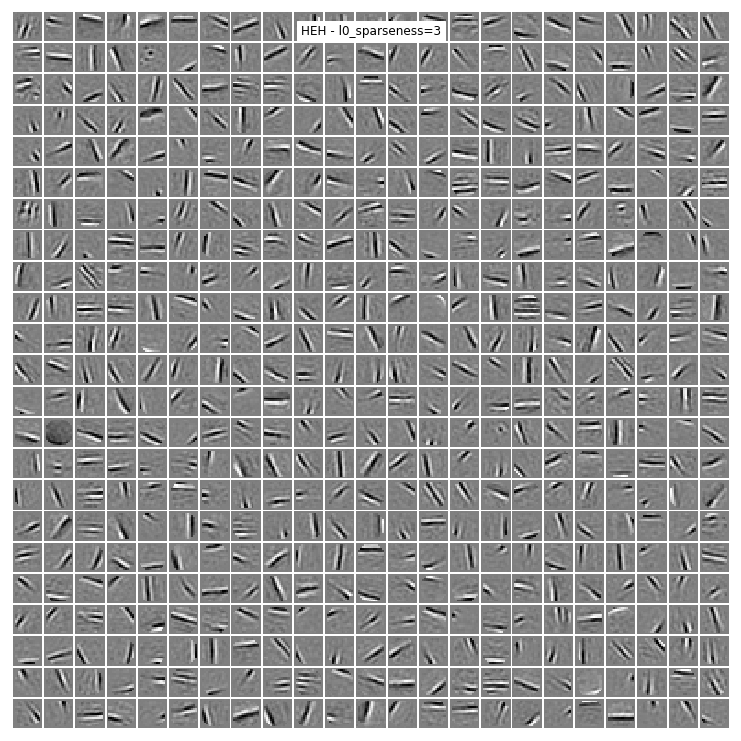

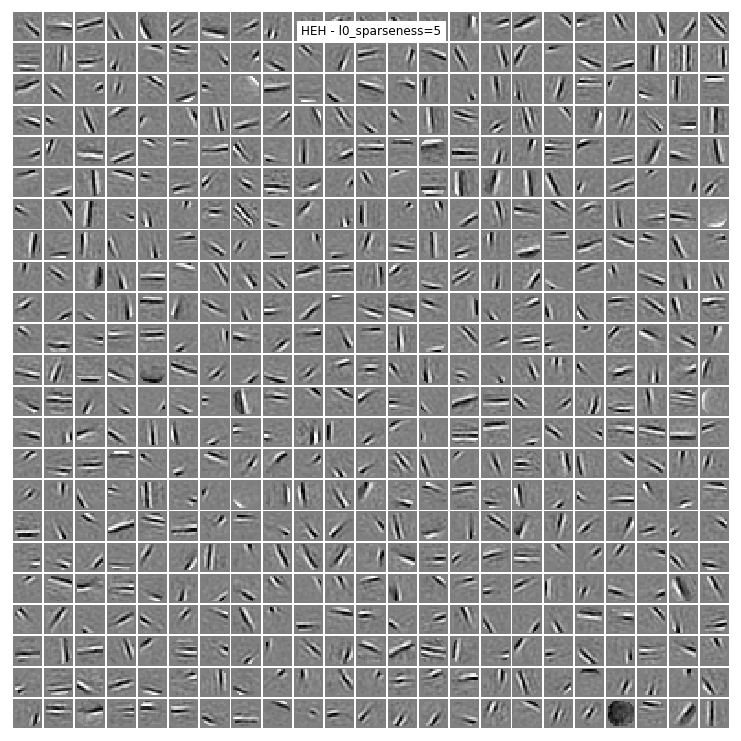

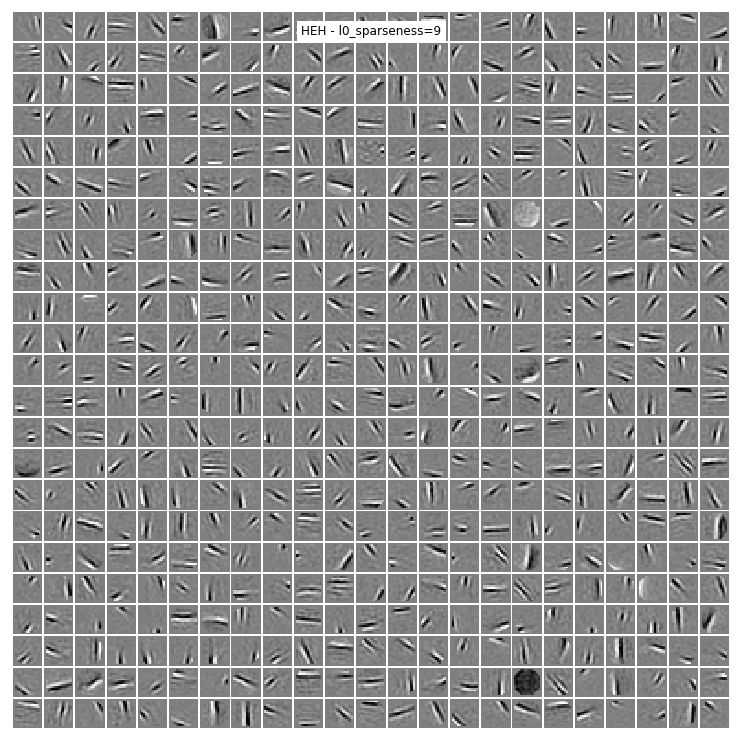

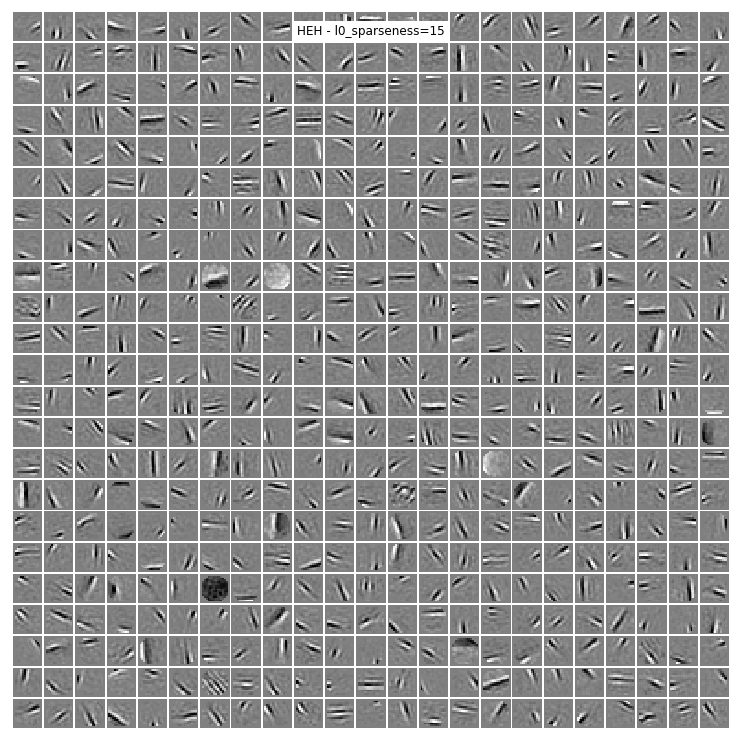

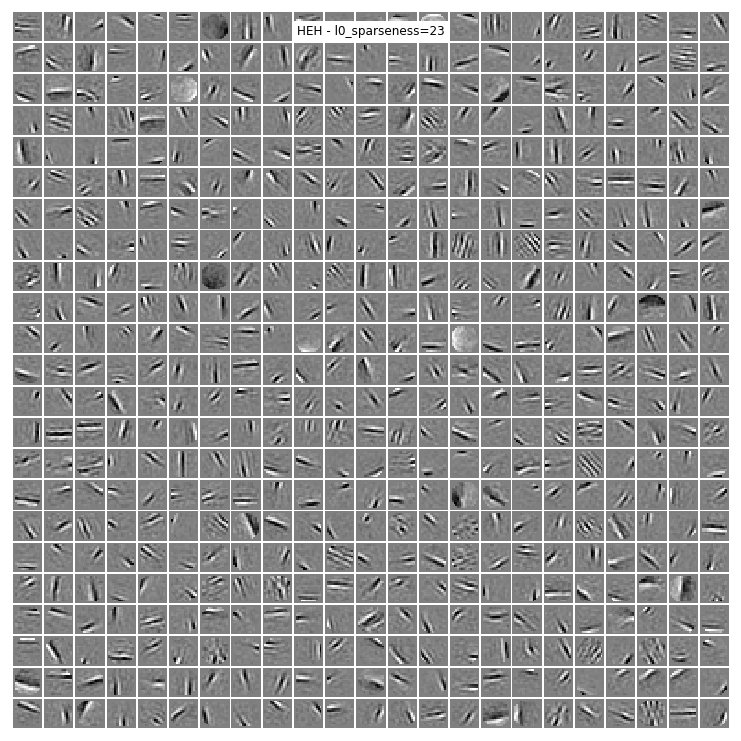

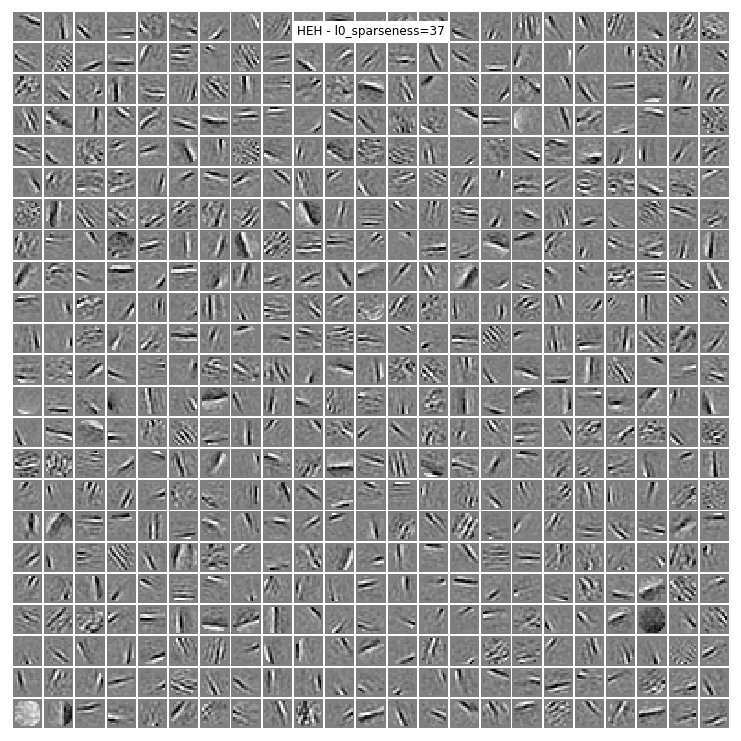

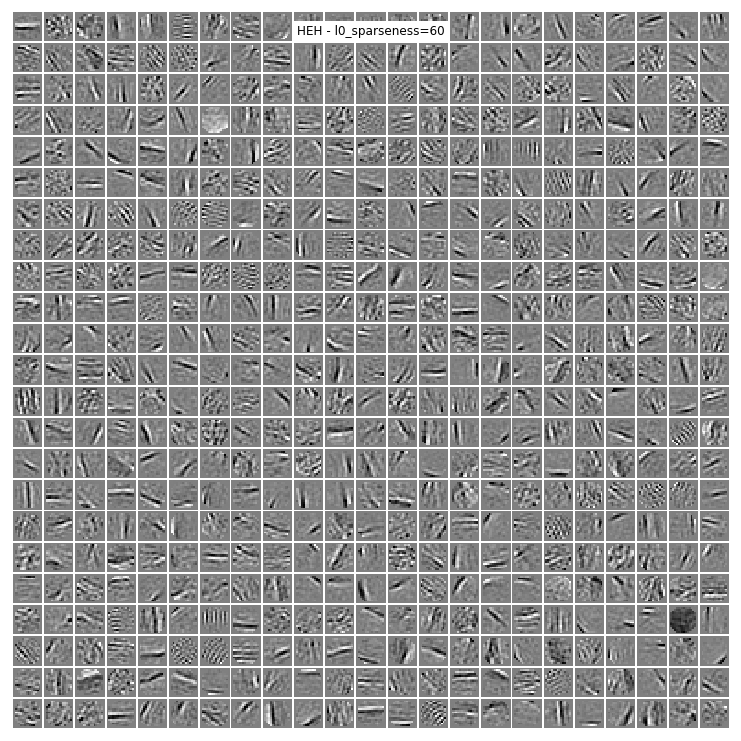

Time evolution of  error


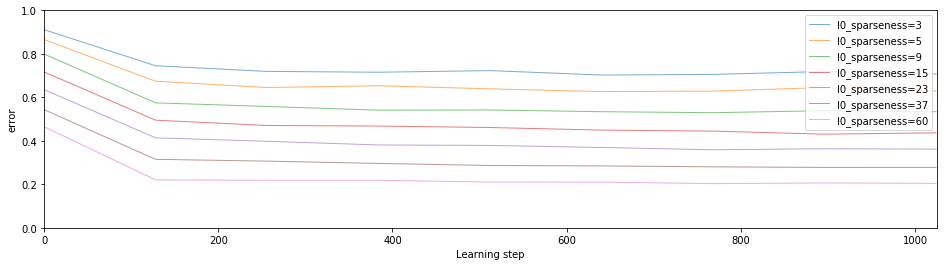

Time evolution of  logL


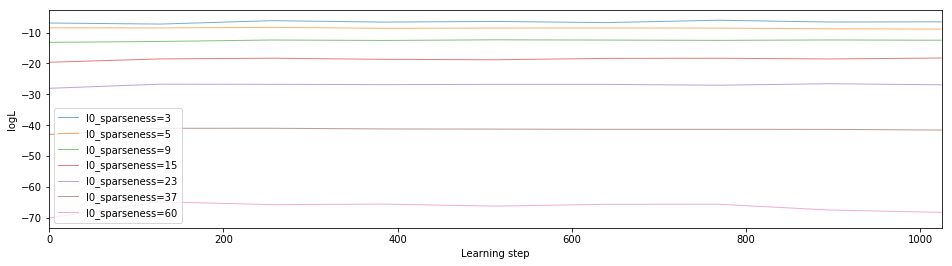

Time evolution of  cputime


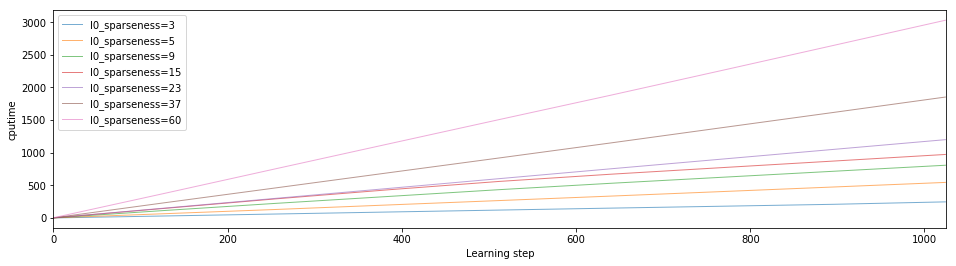

Comparison at the end of learning for  error


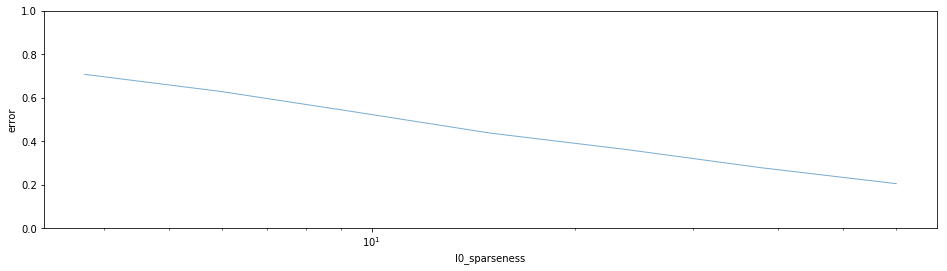

Comparison at the end of learning for  logL


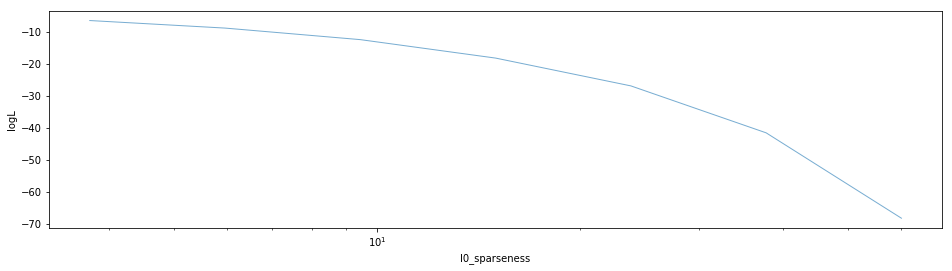

Comparison at the end of learning for  cputime


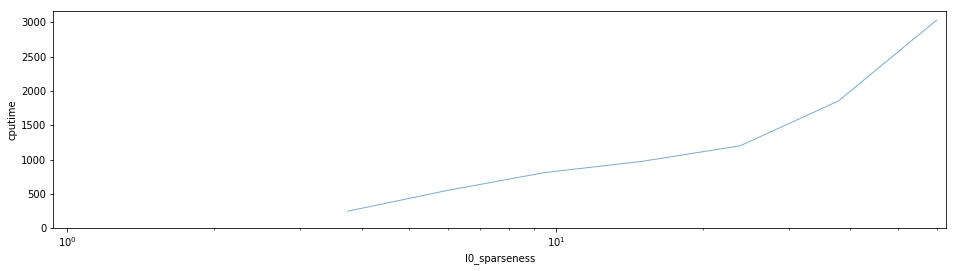

In [17]:
%run {experiments.shl.data_cache}/{tag}.py plot

## Version used

In [ ]:
%load_ext version_information

In [ ]:
%version_information numpy, shl_scripts